### Contents
- 1 Import libraries & data
- 2 Address security implications
- 3 Regional segmentation of data
- 4 Exclusion flag for low-activity customer
- 5 Profiling customer
- 6 Visualization for distribution of profiles
- 7 Aggregate variables on customer-profile level for usage frequency and expenditure
- 8 Compare customer profiles with regions and departments
- 9 Visualizations

### 1. Import Libraries & Data

In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [11]:
# Create path
path = r'C:\Users\nanh9\Instacart Basket Analysis'

In [12]:
# Import data
df = pd.read_pickle(os.path.join(path, '02 Data' , 'Prepared Data' , 'ords_prods_cust_merge.pkl'))

### 2. Address Security Implications

In [14]:
# Display all columns
pd.set_option('display.max_columns', None)

In [15]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,Customer_frequency,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependents_count,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,186761,186761,7,2,8,6.0,False,18,1,Mid-range product,Regularly busy,Regularly busy,Average orders,7,New customer,5.985714,low_spender,6.0,Frequent Customer,NaN,Morse,Male,Wisconsin,49,5/28/2018,0,single,111493
1,1,Chocolate Sandwich Cookies,61,19,5.8,200390,200390,4,2,0,7.0,False,10,0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer,6.591667,low_spender,7.0,Frequent Customer,Peter,Villegas,Male,Georgia,21,10/19/2018,1,living with parents and siblings,79894
2,1,Chocolate Sandwich Cookies,61,19,5.8,19989,19989,11,2,7,8.0,False,1,0,Mid-range product,Regularly busy,Regularly busy,Average orders,11,Regular customer,7.250000,low_spender,8.0,Frequent Customer,Marilyn,Lyons,Female,Washington,81,6/5/2019,2,married,112668
3,1,Chocolate Sandwich Cookies,61,19,5.8,138748,138748,30,3,16,8.0,False,2,1,Mid-range product,Regularly busy,Least busy,Most orders,30,Regular customer,5.133333,low_spender,8.0,Frequent Customer,NaN,Mason,Female,North Carolina,81,11/11/2017,3,married,164020
4,1,Chocolate Sandwich Cookies,61,19,5.8,49629,49629,18,1,14,30.0,False,1,0,Mid-range product,Regularly busy,Busiest days,Most orders,18,Regular customer,6.000000,low_spender,30.0,Non_frequent_customer,Gregory,Cain,Male,Colorado,24,9/27/2017,3,married,100653


- df has personally identifiable information (PII), such as first_name and last_name
- dropping them will solve this issue

In [17]:
df = df.drop(['first_name', 'last_name'], axis=1)

In [18]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,dependents_count,family_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,186761,186761,7,2,8,6.0,False,18,1,Mid-range product,Regularly busy,Regularly busy,Average orders,7,New customer,5.985714,low_spender,6.0,Frequent Customer,Male,Wisconsin,49,5/28/2018,0,single,111493
1,1,Chocolate Sandwich Cookies,61,19,5.8,200390,200390,4,2,0,7.0,False,10,0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer,6.591667,low_spender,7.0,Frequent Customer,Male,Georgia,21,10/19/2018,1,living with parents and siblings,79894
2,1,Chocolate Sandwich Cookies,61,19,5.8,19989,19989,11,2,7,8.0,False,1,0,Mid-range product,Regularly busy,Regularly busy,Average orders,11,Regular customer,7.250000,low_spender,8.0,Frequent Customer,Female,Washington,81,6/5/2019,2,married,112668
3,1,Chocolate Sandwich Cookies,61,19,5.8,138748,138748,30,3,16,8.0,False,2,1,Mid-range product,Regularly busy,Least busy,Most orders,30,Regular customer,5.133333,low_spender,8.0,Frequent Customer,Female,North Carolina,81,11/11/2017,3,married,164020
4,1,Chocolate Sandwich Cookies,61,19,5.8,49629,49629,18,1,14,30.0,False,1,0,Mid-range product,Regularly busy,Busiest days,Most orders,18,Regular customer,6.000000,low_spender,30.0,Non_frequent_customer,Male,Colorado,24,9/27/2017,3,married,100653


### 3. Regional Segmentation of Data

In [20]:
# Before storing regional data into new list, create empty list
region_us = []

In [21]:
# set up conditions for correct state and region placements
for state in df["state"]:
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island',
                 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region_us.append("Northeast")
    elif state in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 
                   'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region_us.append("Midwest")
    elif state in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 
                   'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 
                   'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region_us.append("South")
    elif state in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona',
                   'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region_us.append("West")
    else:
        region_us.append("Unknown")

In [22]:
# Add new list 'region_us' to the dataframe df
df['region'] = region_us

In [23]:
# Create crosstab to compare spending habits
crosstab = pd.crosstab (df['region'], df['spending_flag'],dropna = False)

In [24]:
crosstab.to_clipboard()

In [25]:
# Print crosstab
print(crosstab)

spending_flag  high_spender  low_spender
region                                  
Midwest               22954       437580
Northeast             17800       324764
South                 33078       618659
West                  24646       473687


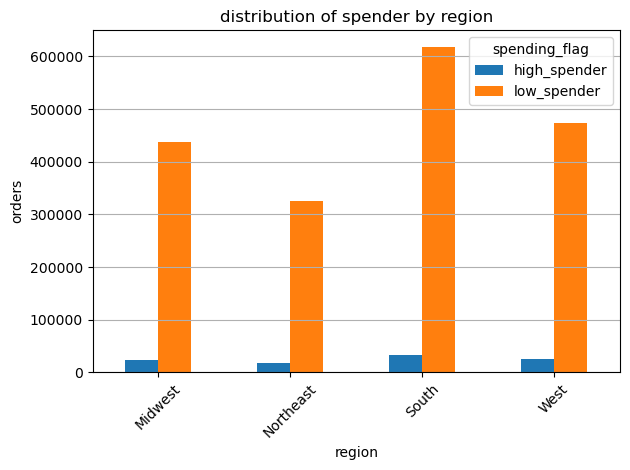

In [26]:
# Bar chart of crosstab
bar_reg_spending = crosstab.plot.bar()
# format
plt.title('distribution of spender by region')
plt.xlabel('region')
plt.ylabel('orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
# save & show
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'bar_spendinggr_reg.png'), bbox_inches='tight', dpi=300)
plt.show()

The South has the most low_spender and high_spender. Followed by the West, Midwest and Northeast.
The ratio of low_spender and high_spender are fairly the same.

In [28]:
# Export bar chart
bar_reg_spending.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'Final', 'bar_reg_spending.png'))

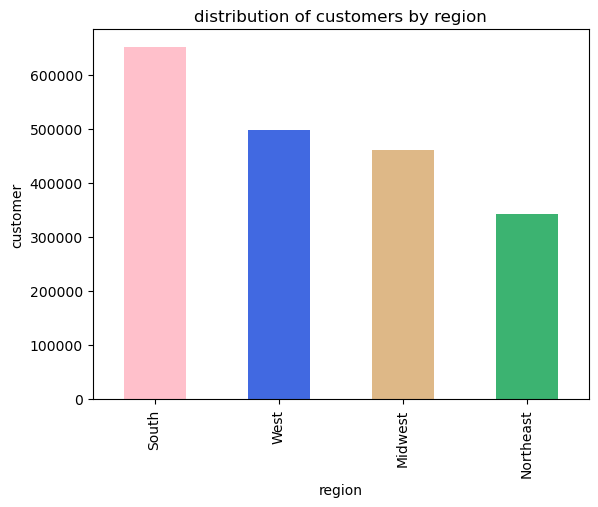

In [29]:
# Create bar chart region

# Plot chart
bar_reg = df['region'].value_counts().plot.bar(color = ['pink', 'royalblue', 'burlywood', 'mediumseagreen'])

# Set formatting
plt.title('distribution of customers by region')
plt.ylabel('customer')
plt.xlabel('region')
bar_reg = plt.gcf()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','Final',  'bar_reg.png'), bbox_inches = 'tight')

### 4. Exclusion flag for low-activity customer

In [31]:
# Create new column to flag low-activity customers
# Exclude customers with max_order < 5
df.loc[df['max_order'] < 5, 'activity_flag'] = 'low-activity customer'

In [32]:
# Keep customers with max_order >= 5
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [33]:
# Check df 
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,dependents_count,family_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,186761,186761,7,2,8,6.0,False,18,1,Mid-range product,Regularly busy,Regularly busy,Average orders,7,New customer,5.985714,low_spender,6.0,Frequent Customer,Male,Wisconsin,49,5/28/2018,0,single,111493,Midwest,high-activity customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,200390,200390,4,2,0,7.0,False,10,0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer,6.591667,low_spender,7.0,Frequent Customer,Male,Georgia,21,10/19/2018,1,living with parents and siblings,79894,South,low-activity customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,19989,19989,11,2,7,8.0,False,1,0,Mid-range product,Regularly busy,Regularly busy,Average orders,11,Regular customer,7.250000,low_spender,8.0,Frequent Customer,Female,Washington,81,6/5/2019,2,married,112668,West,high-activity customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,138748,138748,30,3,16,8.0,False,2,1,Mid-range product,Regularly busy,Least busy,Most orders,30,Regular customer,5.133333,low_spender,8.0,Frequent Customer,Female,North Carolina,81,11/11/2017,3,married,164020,South,high-activity customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,49629,49629,18,1,14,30.0,False,1,0,Mid-range product,Regularly busy,Busiest days,Most orders,18,Regular customer,6.000000,low_spender,30.0,Non_frequent_customer,Male,Colorado,24,9/27/2017,3,married,100653,West,high-activity customer


In [34]:
df['activity_flag'].value_counts()

activity_flag
high-activity customer    1473820
low-activity customer      479348
Name: count, dtype: int64

In [35]:
exclusion_flag_crosstab = pd.crosstab(df['max_order'], df['activity_flag'], dropna = False)

In [36]:
exclusion_flag_crosstab.to_clipboard()

- Pasted into Excel-sheet and confirmed that max_order < 5 are 'Exclude'

In [38]:
# Create new df without 'low-activity customer'
df_excluded = df[df['activity_flag'] != 'low-activity customer']

In [39]:
df_excluded.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,dependents_count,family_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,186761,186761,7,2,8,6.0,False,18,1,Mid-range product,Regularly busy,Regularly busy,Average orders,7,New customer,5.985714,low_spender,6.0,Frequent Customer,Male,Wisconsin,49,5/28/2018,0,single,111493,Midwest,high-activity customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,19989,19989,11,2,7,8.0,False,1,0,Mid-range product,Regularly busy,Regularly busy,Average orders,11,Regular customer,7.250000,low_spender,8.0,Frequent Customer,Female,Washington,81,6/5/2019,2,married,112668,West,high-activity customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,138748,138748,30,3,16,8.0,False,2,1,Mid-range product,Regularly busy,Least busy,Most orders,30,Regular customer,5.133333,low_spender,8.0,Frequent Customer,Female,North Carolina,81,11/11/2017,3,married,164020,South,high-activity customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,49629,49629,18,1,14,30.0,False,1,0,Mid-range product,Regularly busy,Busiest days,Most orders,18,Regular customer,6.000000,low_spender,30.0,Non_frequent_customer,Male,Colorado,24,9/27/2017,3,married,100653,West,high-activity customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,97398,97398,20,2,10,25.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,20,Regular customer,5.550000,low_spender,25.0,Non_frequent_customer,Male,Pennsylvania,21,6/4/2019,3,living with parents and siblings,100964,Northeast,high-activity customer


In [40]:
df_excluded

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,dependents_count,family_status,income,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,186761,186761,7,2,8,6.0,False,18,1,Mid-range product,Regularly busy,Regularly busy,Average orders,7,New customer,5.985714,low_spender,6.0,Frequent Customer,Male,Wisconsin,49,5/28/2018,0,single,111493,Midwest,high-activity customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,19989,19989,11,2,7,8.0,False,1,0,Mid-range product,Regularly busy,Regularly busy,Average orders,11,Regular customer,7.250000,low_spender,8.0,Frequent Customer,Female,Washington,81,6/5/2019,2,married,112668,West,high-activity customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,138748,138748,30,3,16,8.0,False,2,1,Mid-range product,Regularly busy,Least busy,Most orders,30,Regular customer,5.133333,low_spender,8.0,Frequent Customer,Female,North Carolina,81,11/11/2017,3,married,164020,South,high-activity customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,49629,49629,18,1,14,30.0,False,1,0,Mid-range product,Regularly busy,Busiest days,Most orders,18,Regular customer,6.000000,low_spender,30.0,Non_frequent_customer,Male,Colorado,24,9/27/2017,3,married,100653,West,high-activity customer
5,1,Chocolate Sandwich Cookies,61,19,5.8,97398,97398,20,2,10,25.0,False,1,1,Mid-range product,Regularly busy,Regularly busy,Most orders,20,Regular customer,5.550000,low_spender,25.0,Non_frequent_customer,Male,Pennsylvania,21,6/4/2019,3,living with parents and siblings,100964,Northeast,high-activity customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953158,49686,Artisan Baguette,112,3,7.8,182566,182566,21,4,16,11.0,False,3,1,Mid-range product,Least busy,Least busy,Most orders,21,Regular customer,8.700000,low_spender,11.0,Regular customer,Male,Mississippi,72,5/8/2017,1,married,38533,South,high-activity customer
1953160,49686,Artisan Baguette,112,3,7.8,109471,109471,21,1,0,5.0,False,8,1,Mid-range product,Regularly busy,Busiest days,Fewest orders,21,Regular customer,9.410000,low_spender,5.0,Frequent Customer,Female,New Jersey,61,12/21/2019,0,divorced/widowed,94020,Northeast,high-activity customer
1953161,49686,Artisan Baguette,112,3,7.8,77756,77756,22,2,5,8.0,False,7,1,Mid-range product,Regularly busy,Regularly busy,Fewest orders,22,Regular customer,10.225000,high_spender,8.0,Frequent Customer,Female,Oregon,60,1/2/2019,3,married,92267,West,high-activity customer
1953163,49688,Fresh Foaming Cleanser,73,11,13.5,122127,122127,16,4,19,1.0,False,5,0,Mid-range product,Least busy,Least busy,Average orders,16,Regular customer,8.660000,low_spender,1.0,Frequent Customer,Female,Maryland,22,2/1/2019,3,married,96984,South,high-activity customer


In [41]:
# Export filtered data
df_excluded.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_instacart.pkl'))

### 5. Profiling customer & 6. Visualization for distribution of profiles

#### Age

In [44]:
# Check age range
df['age'].describe()

count    1.953168e+06
mean     4.950164e+01
std      1.846109e+01
min      1.800000e+01
25%      3.400000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

- age range between 18 - 81 years
- Categorize age: young adult 18-29, adult 30-65, senior 65-81

In [46]:
# Create profiling variables for age categories
df.loc[df['age'] <= 29 ,'age_group'] = 'Young Adult'
df.loc[(df['age'] > 29) & (df['age'] < 65) ,'age_group'] = 'Adult'
df.loc[df['age'] >= 65 ,'age_group'] = 'Senior'

In [47]:
df['age_group'].value_counts()

age_group
Adult          1072129
Senior          516427
Young Adult     364612
Name: count, dtype: int64

In [48]:
age_group_counts = df['age_group'].value_counts(dropna = False)

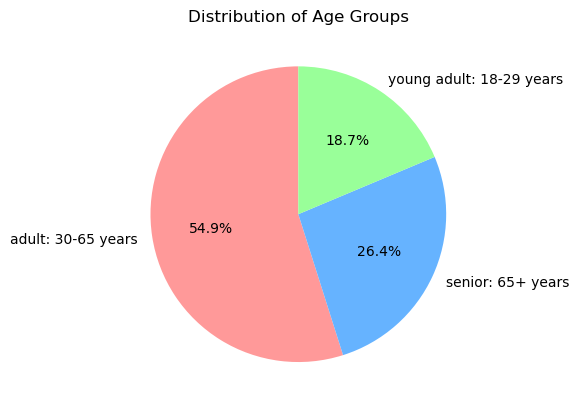

In [49]:
# Create pie chart for age_groups distribution
pie_age_group_distribution = age_group_counts.plot.pie(autopct='%1.1f%%', labels= ['adult: 30-65 years', 'senior: 65+ years', 'young adult: 18-29 years' ], startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.ylabel('')  # Hide the y-label
plt.title('Distribution of Age Groups')
plt.show()

In [50]:
# Export pie chart
pie_age_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Final', 'pie_age_group_distribution.png'))

### orders by day of the week

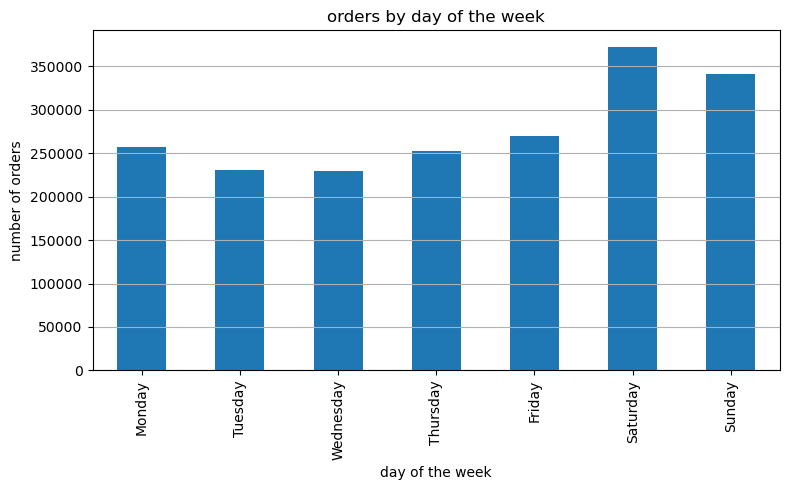

In [52]:
# Create a dictionary to map the day numbers to day names
day_mapping = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Create a new order for the days of the week starting from Monday
ordered_days = [2, 3, 4, 5, 6, 0, 1]  # Order: Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday

# Calculate the count of orders per day of the week
order_counts = df['orders_day_of_week'].value_counts()

# Reorder the counts based on the new order
reordered_counts = order_counts.reindex(ordered_days).fillna(0)  # Fill NaN with 0 for days with no orders

# Plot the count of orders per day of the week
bar_dow = reordered_counts.plot(kind='bar', figsize=(8, 5)) # Alternative without color

# Set custom x-axis labels using the day mapping
bar_dow.set_xticklabels([day_mapping[day] for day in ordered_days])

# Add a title and labels
plt.title('orders by day of the week')
plt.xlabel('day of the week')
plt.ylabel('number of orders')
plt.grid(axis='y')  # Optional: add horizontal grid lines for readability

# Adjust layout and save figure
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'bar_order_dow.png'), bbox_inches='tight', dpi=300)
plt.show()

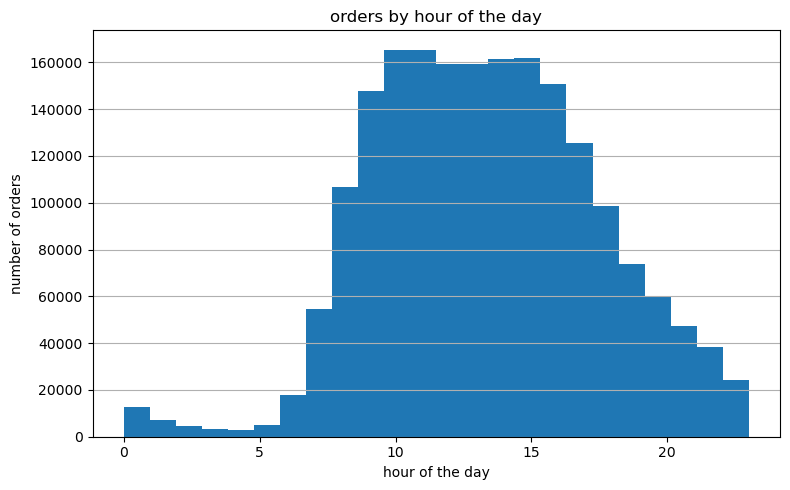

In [53]:
# Plotting the histogram for 'order_hour_of_day' with 24 bins to represent each hour
hist_hour = df['order_hour_of_day'].plot.hist(bins=24, figsize=(8, 5))

# Adding a title and axis labels
plt.title('orders by hour of the day')
plt.xlabel('hour of the day')
plt.ylabel('number of orders')
plt.grid(axis='y')  # Optional: add horizontal grid lines for readability

# Adjust layout and save figure
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'hist_order_hour.png'), bbox_inches='tight', dpi=300)
plt.show()

### orders by hour & income

In [55]:
# Create list to store results
hour_result = []

for hour in df["order_hour_of_day"]:
    if 5 <= hour <= 11:  # Morning (5am - 11am)
        hour_result.append("Morning")
    elif 12 <= hour <= 16:  # Afternoon (12pm - 4pm)
        hour_result.append("Afternoon")
    elif 17 <= hour <= 20:  # Evening (5pm - 8 pm)
        hour_result.append("Evening")
    else:  # Night (9pm - 4am)
        hour_result.append("Night")

# Adding the new classification to the DataFrame
df['hour_group'] = hour_result

C:\Users\nanh9\AppData\Local\Temp\ipykernel_2176\4259306190.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_hour_counts = df.groupby('hour_group')['order_id'].count().reset_index()


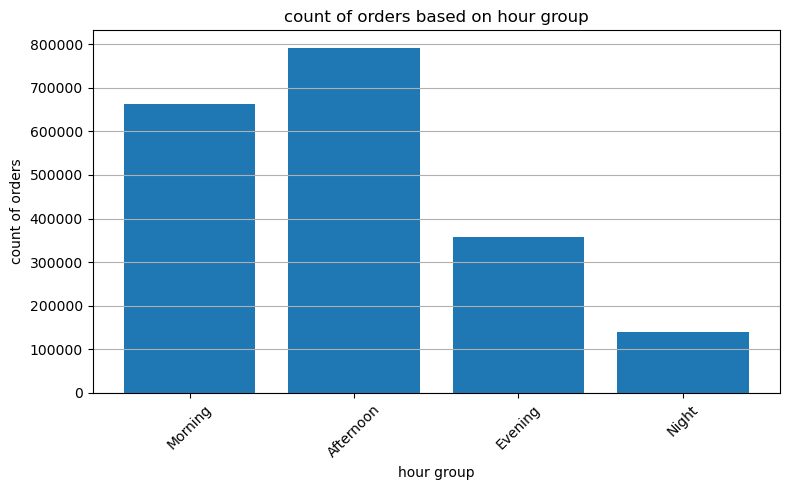

In [56]:
# Convert 'hour_group' to a categorical type with the specified order
hour_order = ['Morning', 'Afternoon', 'Evening', 'Night']
df['hour_group'] = pd.Categorical(df['hour_group'], categories=hour_order, ordered=True)

# Group by 'hour_group' and count the number of 'order_id's
order_hour_counts = df.groupby('hour_group')['order_id'].count().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(order_hour_counts['hour_group'], order_hour_counts['order_id'])
plt.title('count of orders based on hour group')
plt.xlabel('hour group')
plt.ylabel('count of orders')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'bar_orders_hour.png.png'), bbox_inches='tight', dpi=300)
plt.show()

#### Income

In [58]:
# Check income range
df['income'].describe()

count    1.953168e+06
mean     9.469189e+04
std      4.236602e+04
min      2.590300e+04
25%      5.991400e+04
50%      9.367200e+04
75%      1.242550e+05
max      5.939010e+05
Name: income, dtype: float64

- income range = 25903 - 593901

In [60]:
# Create an income group variable
df.loc[df['income'] <= 55000, 'income_group'] = 'low income'
df.loc[(df['income'] > 55000) & (df['income'] <= 150000), 'income_group'] = 'middle income'
df.loc[df['income'] > 150000, 'income_group'] = 'high income'

In [61]:
# Check income distribution
df['income_group'].value_counts()

income_group
middle income    1336342
low income        396697
high income       220129
Name: count, dtype: int64

In [62]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,first_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spending_flag,Customer_frequency,frequency_flag,gender,state,age,date_joined,dependents_count,family_status,income,region,activity_flag,age_group,hour_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,186761,186761,7,2,8,6.0,False,18,1,Mid-range product,Regularly busy,Regularly busy,Average orders,7,New customer,5.985714,low_spender,6.0,Frequent Customer,Male,Wisconsin,49,5/28/2018,0,single,111493,Midwest,high-activity customer,Adult,Morning,middle income
1,1,Chocolate Sandwich Cookies,61,19,5.8,200390,200390,4,2,0,7.0,False,10,0,Mid-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer,6.591667,low_spender,7.0,Frequent Customer,Male,Georgia,21,10/19/2018,1,living with parents and siblings,79894,South,low-activity customer,Young Adult,Night,middle income
2,1,Chocolate Sandwich Cookies,61,19,5.8,19989,19989,11,2,7,8.0,False,1,0,Mid-range product,Regularly busy,Regularly busy,Average orders,11,Regular customer,7.250000,low_spender,8.0,Frequent Customer,Female,Washington,81,6/5/2019,2,married,112668,West,high-activity customer,Senior,Morning,middle income
3,1,Chocolate Sandwich Cookies,61,19,5.8,138748,138748,30,3,16,8.0,False,2,1,Mid-range product,Regularly busy,Least busy,Most orders,30,Regular customer,5.133333,low_spender,8.0,Frequent Customer,Female,North Carolina,81,11/11/2017,3,married,164020,South,high-activity customer,Senior,Afternoon,high income
4,1,Chocolate Sandwich Cookies,61,19,5.8,49629,49629,18,1,14,30.0,False,1,0,Mid-range product,Regularly busy,Busiest days,Most orders,18,Regular customer,6.000000,low_spender,30.0,Non_frequent_customer,Male,Colorado,24,9/27/2017,3,married,100653,West,high-activity customer,Young Adult,Afternoon,middle income


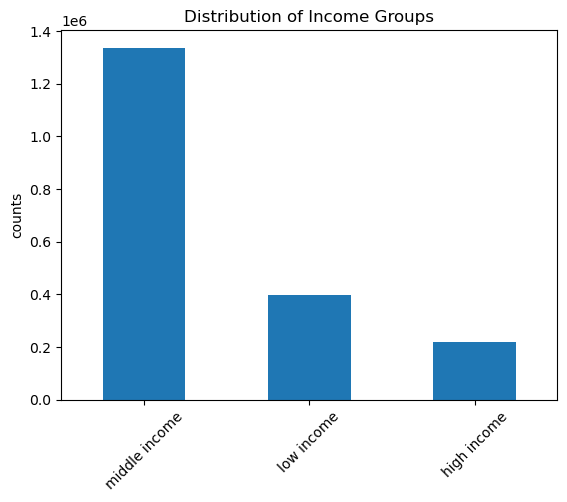

In [63]:
# Create bar chart distribution by income_group
income_group_counts = df['income_group'].value_counts(dropna=False)
bar_income_group_distribution = income_group_counts.plot.bar()

# Adjust layout
plt.title('Distribution of Income Groups')
plt.xlabel('')
plt.ylabel('counts')
plt.xticks(rotation=45)

# save
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'bar_incomegr.png.png'), bbox_inches='tight', dpi=300)
plt.show()

In [64]:
# Export bar chart
bar_income_group_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Final', 'bar_income_group_distribution.png'))

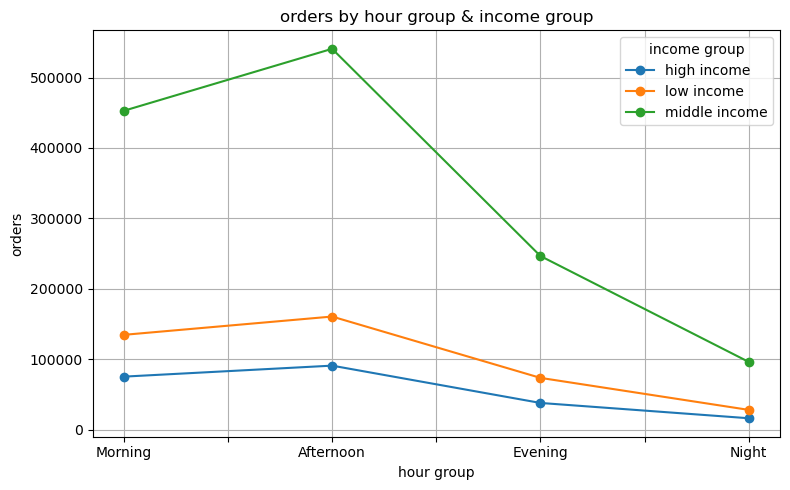

In [65]:
# Create a crosstab for hour_group and income_group
hour_income_crosstab = pd.crosstab(df['hour_group'], df['income_group'])

# Sort the index to ensure the x-axis flows in the logical order of the day
hour_income_crosstab = hour_income_crosstab.reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Plot the crosstab as a line chart
ax = hour_income_crosstab.plot(kind='line', figsize=(8, 5), marker='o')

# Customize the chart
plt.title('orders by hour group & income group')
plt.xlabel('hour group')
plt.ylabel('orders')
plt.xticks(rotation=0)  # Ensure x-axis labels are readable
plt.grid(axis='both')
plt.legend(title='income group')
plt.tight_layout()

# Adjust layout and save the figure
plt.savefig('line_order_hourgr_incomegr.png', bbox_inches='tight', dpi=300)
plt.show()

In [66]:
# Export figure
ax.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Final', 'line_order_hourgr_incomgr.png'), bbox_inches='tight', dpi=300)

### department_id

In [68]:
# Check department_id distribution
df['department_id'].value_counts()

department_id
4     570918
16    325186
19    174279
7     162061
1     135102
13    112706
3      70512
15     64256
20     63639
9      51905
17     44434
12     42911
14     42418
11     27134
18     25724
6      16503
5       9111
8       5991
21      4135
2       2172
10      2071
Name: count, dtype: int64

In [69]:
# Import department dataframe
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [70]:
# Check df_dep
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [71]:
# Rename 'Unnamed: 0' to department_id
df_dep.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [72]:
# Change dtype of 'department_id'
df_dep['department_id'].astype('int64')

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
Name: department_id, dtype: int64

In [73]:
# Check dtype and head
print(df_dep.dtypes)
print(df_dep.head())

department_id     int64
department       object
dtype: object
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [74]:
# Merge df_dep with df_excluded
df_final = df.merge(df_dep, on = 'department_id', how = 'inner', indicator = True)

In [75]:
# Check merge
print(df_final['department_id'].value_counts())

department_id
4     570918
16    325186
19    174279
7     162061
1     135102
13    112706
3      70512
15     64256
20     63639
9      51905
17     44434
12     42911
14     42418
11     27134
18     25724
6      16503
5       9111
8       5991
21      4135
2       2172
10      2071
Name: count, dtype: int64


In [76]:
# We replaced department_id with department values (string), so now we drop department_id after merging
df_final = df_final.drop(['department_id'], axis=1)

<Figure size 1000x600 with 0 Axes>

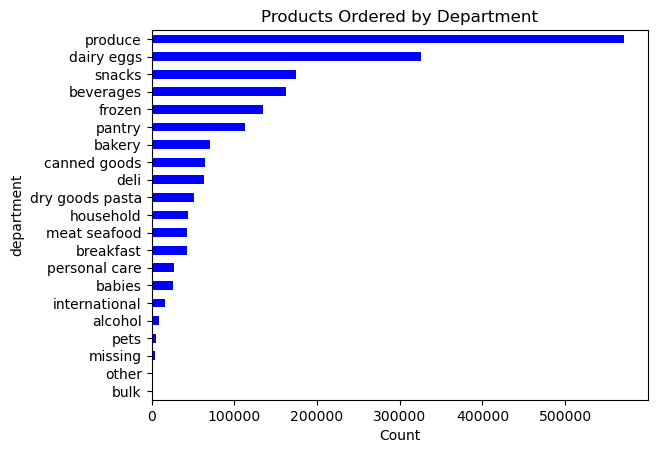

<Figure size 1000x600 with 0 Axes>

In [77]:
# Create horizontal bar chart for most sold departments
bar_dep = df_final['department'].value_counts(ascending=True).plot(kind='barh', color='blue', xlabel = 'Count', title='Products Ordered by Department')
plt.figure(figsize=(10, 6))

In [78]:
# Export line chart
bar_dep.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'bar_dep.png'))

#### Dependents

In [80]:
# Check distribution of dependents_count
df_final['dependents_count'].value_counts()

dependents_count
3    490260
0    489708
1    487864
2    485336
Name: count, dtype: int64

In [81]:
df_final['dependents_count'].describe()

count    1.953168e+06
mean     1.499777e+00
std      1.119583e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependents_count, dtype: float64

dependents range: 0-3

In [83]:
# Create dependents flag 
df_final.loc[df_final['dependents_count'] == 0, 'dependents_flag'] = 'no dependents'
df_final.loc[df_final['dependents_count'] >= 1, 'dependents_flag'] = 'has dependents'

In [84]:
dependents_status = df_final['dependents_flag'].value_counts(dropna=False)
dependents_status

dependents_flag
has dependents    1463460
no dependents      489708
Name: count, dtype: int64

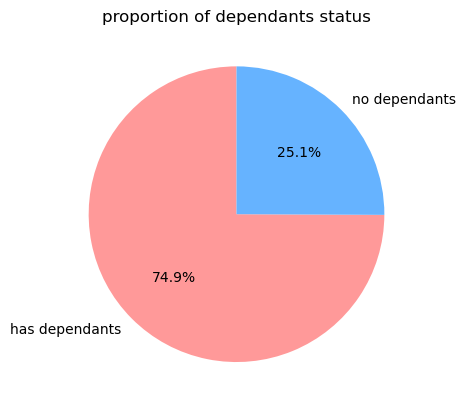

In [85]:
# pie chart for dependents_flag
pie_dependents = dependents_status.plot.pie(autopct='%1.1f%%', labels= ['has dependants', 'no dependants'], startangle=90, colors=['#ff9999','#66b3ff'])
plt.ylabel('')  # Hide the y-label
plt.title('proportion of dependants status')
plt.show()

In [86]:
# Export pie chart
pie_dependents.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'pie_dependents.png'))

In [87]:
# Look for duplicates
dependents_nodup = df_final.drop_duplicates(subset='user_id')['dependents_count'].value_counts().sort_index()

Text(0.5, 1.0, 'unique customers by number of dependents')

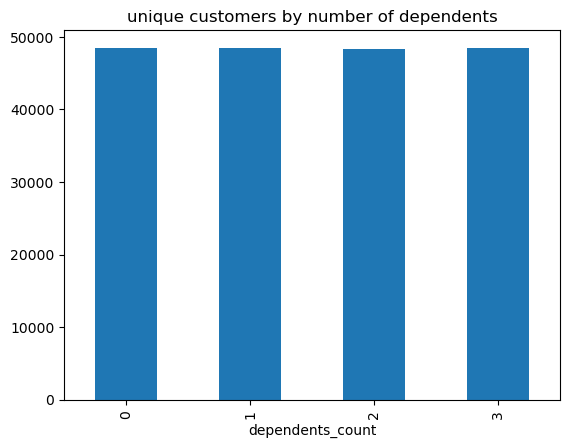

In [88]:
# Create bar chart
bar_dependents_count = dependents_nodup.plot.bar()
bar_dependents_count.set_title('unique customers by number of dependents')

The number of dependents is fairly even across the all customers.

In [90]:
# Export bar chart
bar_dependents_count.figure.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'bar_dependents_count.png'))

### 7. Aggregate variables on customer-profile level for usage frequency and expenditure

In [92]:
# Check columns
df_final.columns

Index(['product_id', 'product_name', 'aisle_id', 'prices', 'order_id',
       'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'first_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'Customer_frequency', 'frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'dependents_count', 'family_status',
       'income', 'region', 'activity_flag', 'age_group', 'hour_group',
       'income_group', 'department', '_merge', 'dependents_flag'],
      dtype='object')

In [93]:
# Create aggregated subset and show total cost for each customer by 'prices'
customer_profile = df_final.groupby(['user_id', 'order_number', 'gender', 'state', 'region', 'dependents_count', 'family_status', 'age_group', 'days_since_last_order', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'frequency_flag', 'dependents_flag', 'income_group', 'spending_flag'])['prices'].sum().reset_index()

In [94]:
# Check output
customer_profile.head()

,user_id,order_number,gender,state,region,dependents_count,family_status,age_group,days_since_last_order,orders_day_of_week,order_hour_of_day,loyalty_flag,frequency_flag,dependents_flag,income_group,spending_flag,prices
0,2,3,Female,Alaska,West,3,married,Senior,8.0,5,9,New customer,Frequent Customer,has dependents,middle income,high_spender,91.6
1,3,16,Female,Arizona,West,3,married,Adult,12.0,5,17,Regular customer,Regular customer,has dependents,middle income,low_spender,70.3
2,4,36,Male,Arkansas,South,3,married,Adult,7.0,1,9,Regular customer,Frequent Customer,has dependents,low income,low_spender,92.8
3,5,42,Female,California,West,0,divorced/widowed,Senior,9.0,6,16,Loyal customer,Frequent Customer,no dependents,middle income,low_spender,210.7
4,6,4,Female,Colorado,West,1,married,Adult,30.0,1,12,New customer,Non_frequent_customer,has dependents,middle income,low_spender,27.5


In [95]:
# Aggregate variables for customer_profile expenditures
customer_agg = customer_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})
print(customer_agg)

        order_number           prices              
                 max min  mean    max    min   mean
user_id                                            
2                  3   3   3.0   91.6   91.6   91.6
3                 16  16  16.0   70.3   70.3   70.3
4                 36  36  36.0   92.8   92.8   92.8
5                 42  42  42.0  210.7  210.7  210.7
6                  4   4   4.0   27.5   27.5   27.5
...              ...  ..   ...    ...    ...    ...
206202            11  11  11.0   31.5   31.5   31.5
206204            32  32  32.0  112.6  112.6  112.6
206206            31  31  31.0    7.9    7.9    7.9
206207            15  15  15.0   30.5   30.5   30.5
206209             2   2   2.0  141.2  141.2  141.2

[181235 rows x 6 columns]


In [96]:
# Aggregate variables for customer_profiles frequency
freq_agg = df_excluded.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'days_since_last_order': ['max', 'min', 'mean']})
print(freq_agg)

        order_number           days_since_last_order            
                 max min  mean                   max   min  mean
user_id                                                         
3                 16  16  16.0                  12.0  12.0  12.0
4                 36  36  36.0                   7.0   7.0   7.0
5                 42  42  42.0                   9.0   9.0   9.0
7                 11  11  11.0                  30.0  30.0  30.0
8                  5   5   5.0                  17.0  17.0  17.0
...              ...  ..   ...                   ...   ...   ...
206200            36  36  36.0                  10.0  10.0  10.0
206202            11  11  11.0                   6.0   6.0   6.0
206204            32  32  32.0                   1.0   1.0   1.0
206206            31  31  31.0                  13.0  13.0  13.0
206207            15  15  15.0                  16.0  16.0  16.0

[145605 rows x 6 columns]


### 8. Compare customer profiles with regions and departments

#### departments by region

In [99]:
# Create crosstab region vs department
crosstab_reg_dep = pd.crosstab(df_final['region'], df_final['department'], dropna = False)
crosstab_reg_dep

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
region,,,,,,,,,,,,,,,,,,,,,
Midwest,2120,5940,16739,37957,9948,504,15206,76876,15036,12139,32077,10463,3936,10039,991,506,26325,6430,1445,134764,41093
Northeast,1579,4531,12473,28776,7506,367,11183,57160,11123,9040,23618,7705,2841,7551,718,396,19741,4697,1008,99765,30786
South,3075,8602,23526,53508,14215,678,21371,108608,21338,17210,44955,14817,5470,14322,1367,754,37843,9152,2034,190333,58559
West,2337,6651,17774,41820,10749,522,16496,82542,16142,13516,34452,11449,4256,10999,1059,516,28797,6855,1504,146056,43841


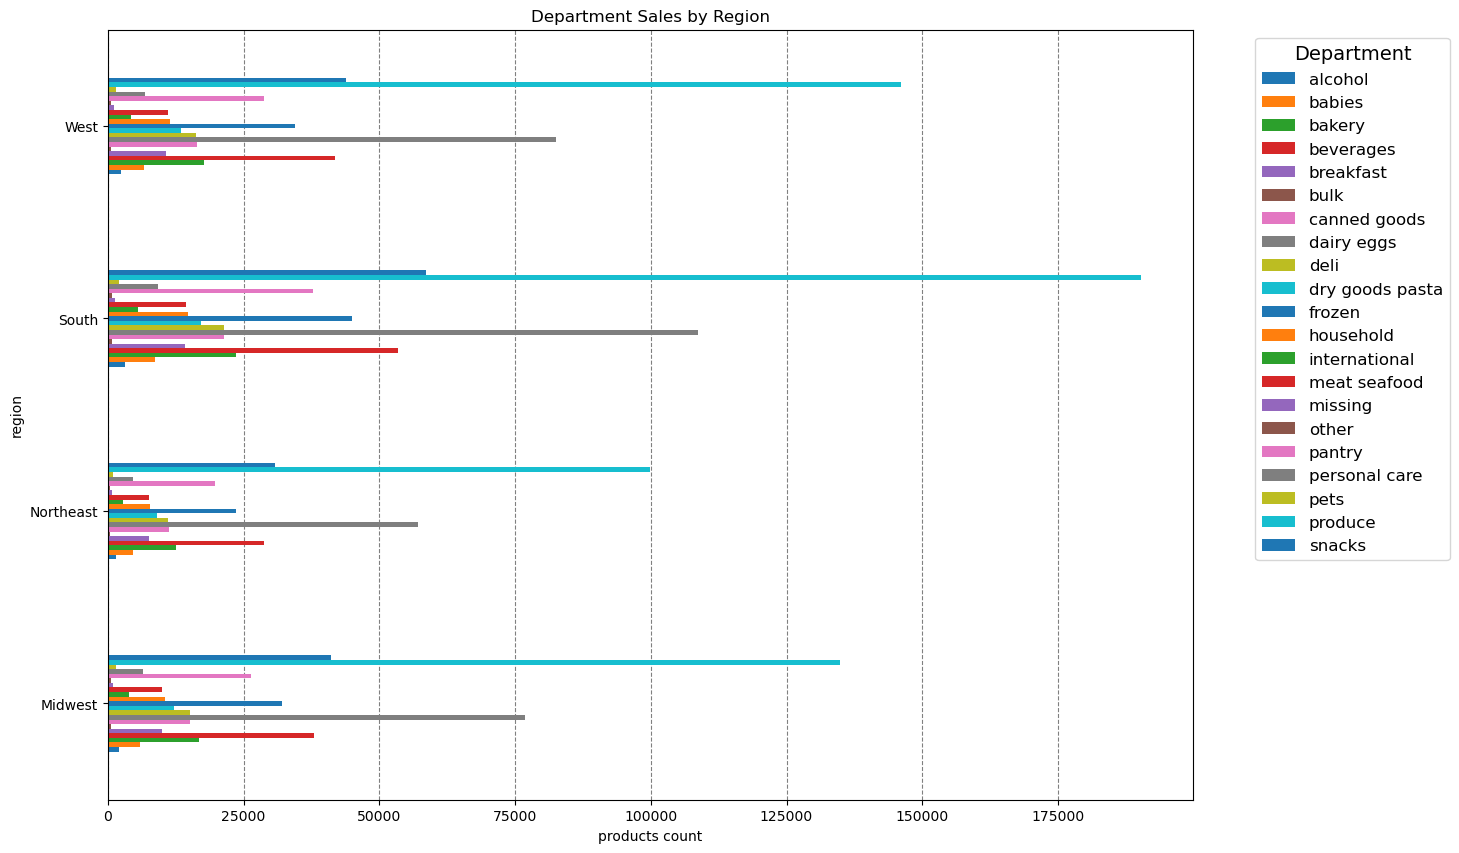

In [100]:
# Create Bar chart
bar_reg_dep = crosstab_reg_dep.plot(kind = 'barh', figsize=(14,10))
# Overlay grid behind bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='x', color='gray', linestyle='dashed')
# General formatting
plt.title('Department Sales by Region')
plt.xlabel('products count')
plt.ylabel('region')
# Move legend outside of plot
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
# Export and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'bar_reg_dep'), bbox_inches = 'tight')
plt.show()

#### age_group by region

In [102]:
# Create crosstab region vs department
crosstab_agegr_reg = pd.crosstab(df_final['region'], df_final['age_group'], dropna = False)
crosstab_agegr_reg

age_group,Adult,Senior,Young Adult
region,,,
Midwest,255008,120632,84894
Northeast,190482,89723,62359
South,354192,173834,123711
West,272447,132238,93648


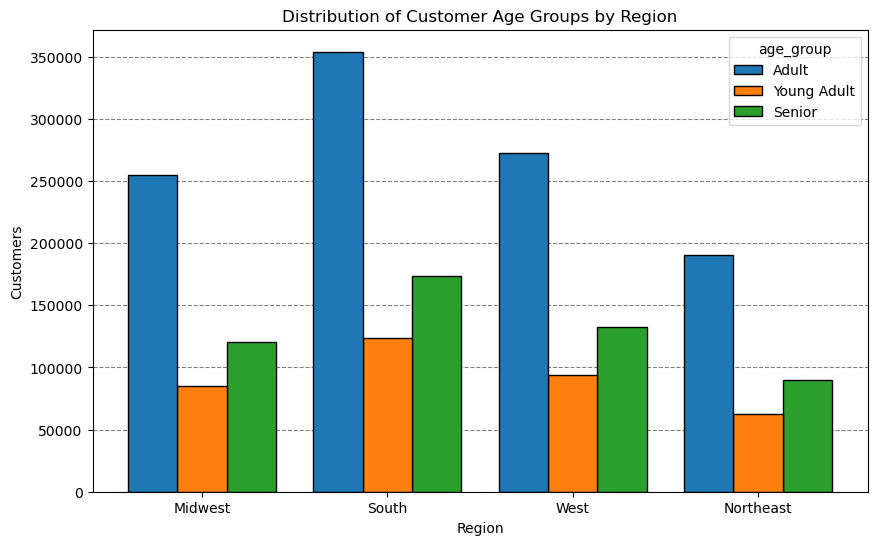

In [103]:
# Create histogram age_group by region
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay grid behind bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Customer Age Groups by Region')
plt.ylabel('Customers')
plt.xlabel('Region')
# Export and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'hist_agegr_reg.png'), bbox_inches = 'tight')
plt.show()

### income by region

In [105]:
# Create crosstab region vs department
crosstab_incomegr_reg = pd.crosstab(df_final['region'], df_final['income_group'], dropna = False)
crosstab_incomegr_reg

income_group,high income,low income,middle income
region,,,
Midwest,51587,92947,316000
Northeast,38125,69712,234727
South,73902,132707,445128
West,56515,101331,340487


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001A14FEB18A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

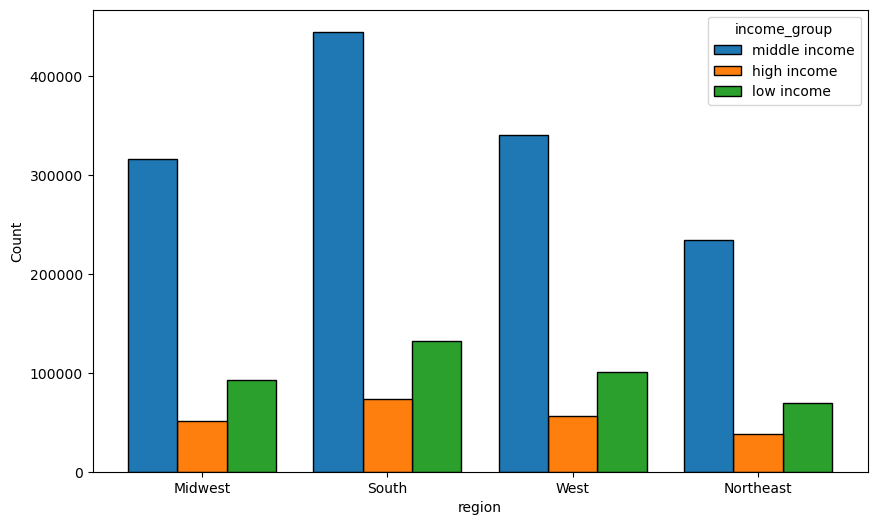

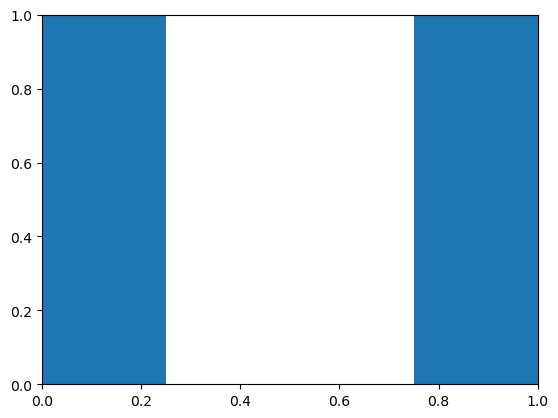

In [106]:
# Create histogram income by region
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
df.plot(x='region', kind='bar', stacked=True,
        title='income_group_distribution')
# Overlay grid behind bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution Income Group by Region')
plt.ylabel('Customers')
plt.xlabel('Region')
# Export and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'hist_incomegr_reg.png'), bbox_inches = 'tight')
plt.show()

### age_group by income_group

In [ ]:
# Create histogram age_group by income_group
plt.figure(figsize=(10, 6))
sns.histplot(data=df_final, x='income_group', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay grid behind bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('age groups by income')
plt.ylabel('age_group')
plt.xlabel('income_group')
# Export and show
plt.savefig(os.path.join(path,'04 Analysis','Visualizations', 'Final', 'hist_agegr_incomegr.png'), bbox_inches = 'tight')
plt.show()

### Export dataframe

In [108]:
df_final.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))